In [8]:
import numpy as np
from qutip import destroy, Qobj
import matplotlib.pyplot as plt

# problem solved:
# .cosm(), not np.cos()
# errors are due to truncated space: just increase number of levels
# plot omega, alpha against number of dimensions, see when they combine, what level of error do i want to allow?
# 8 dimensions seems right to minimise Ω and α errors

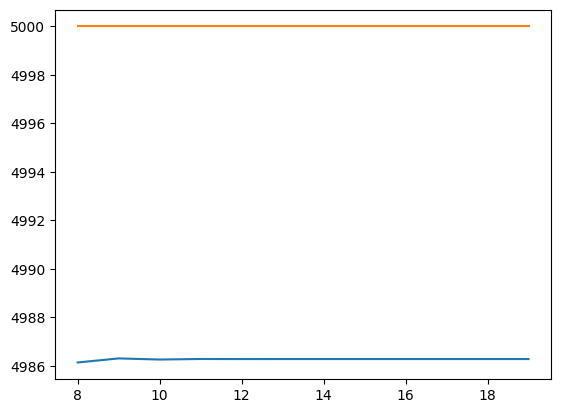

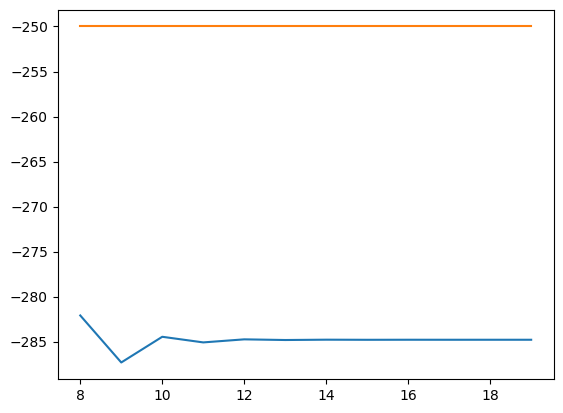

In [18]:
Ω = 5000
α = -250

Ec = -1*α
Ej = -1 * (Ω-α)**2 / (8*α)

nzpf = (Ej/(32*Ec)) ** 0.25
φzpf = ((2*Ec)/Ej) ** 0.25

H_freqs, HRWA_freqs = [], []
H_anharms, HRWA_anharms = [], []

n_level_range = range(8,20)

for n_levels in n_level_range:
    a = destroy(n_levels)
    n = 1j * nzpf * (a.dag() - a)
    φ = φzpf * (a.dag() + a)

    H = 4*Ec*n**2 - Ej * φ.cosm()
    HRWA = Ω*a.dag()*a + 0.5*α*a.dag()*a*(a.dag()*a-1)

    He, HRWAe = H.eigenenergies(), HRWA.eigenenergies()

    H_freqs.append(He[1]-He[0])
    HRWA_freqs.append(HRWAe[1]-HRWAe[0])

    H_anharms.append((He[2]-He[1])-(He[1]-He[0]))
    HRWA_anharms.append((HRWAe[2]-HRWAe[1])-(HRWAe[1]-HRWAe[0]))

plt.plot(n_level_range, H_freqs)
plt.plot(n_level_range, HRWA_freqs)
plt.show()

plt.plot(n_level_range, H_anharms)
plt.plot(n_level_range, HRWA_anharms)
plt.show()

definition Simo has been using: see photo with $\beta=2$

also see the paper he sent - use the expansion for frequency and anharmonicity?

In [3]:
H = 4*Ec*n**2 - Ej * φ.cosm()
# H = 4*Ec*n**2 - Ej * Qobj(np.cos(φ.full())) # ELEMENTWISE???
H_trunc = 4*Ec*n**2 - Ej*(1-φ**2/2 + φ**4/24) # cosine expansion to fourth order
HRWA = Ω*a.dag()*a + 0.5*α*a.dag()*a*(a.dag()*a-1)

In [4]:
print(H)
print()
print(H_trunc)
print()
print(HRWA)

Quantum object: dims = [[30], [30]], shape = (30, 30), type = oper, isherm = False
Qobj data =
[[-1.12168122e+04  0.00000000e+00 -1.68619750e+02  0.00000000e+00
  -9.27903909e+01  0.00000000e+00  3.22688192e+00  0.00000000e+00
  -8.21352828e-02  0.00000000e+00  1.64910838e-03  0.00000000e+00
  -2.73402782e-05  0.00000000e+00  3.86018334e-07  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.20527657e+03  0.00000000e+00 -4.77638756e+02
   0.00000000e+00 -1.99581408e+02  0.00000000e+00  8.30521340e+00
   0.00000000e+00 -2.41190910e-01  0.00000000e+00  5.37476423e-03
   0.00000000e+00 -9.71324266e-05  0.00000000e+00  1.47605791e-06
   0.00000000e+00 -1.93496876e-08  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0000000

In [5]:
H.eigenenergies()-H.eigenenergies()[0]

array([     0.        +0.j,   4986.27976883+0.j,   9687.76976004+0.j,
        14070.83943175+0.j,  18082.9417411 +0.j,  18581.18021   +0.j,
        21627.7719165 +0.j,  22831.71425242+0.j,  24750.43425095+0.j,
        26139.49256628+0.j,  29140.4575303 +0.j,  29263.34237249+0.j,
        34036.32482424+0.j,  34395.86442165+0.j,  40318.00526623+0.j,
        40620.33946741+0.j,  47847.11371281+0.j,  48042.03614044+0.j,
        56714.43239365+0.j,  56730.20222728+0.j,  66808.68602368+0.j,
        67073.21679224+0.j,  78468.96450799+0.j,  79164.840397  +0.j,
        91987.88772227+0.j,  93382.67253736+0.j, 107973.8301934 +0.j,
       110439.80113863+0.j, 126130.50154075+0.j, 132357.49391375+0.j])

In [6]:
H_trunc.eigenenergies()-H_trunc.eigenenergies()[0]

array([     0.        ,   5672.85794979,  48019.08641244,  52699.87283002,
        59273.76686422,  64243.25273975,  68881.37228055,  72170.61937341,
        73153.07419924,  74788.30469113,  77072.00960207,  79624.72464367,
        83118.15824279,  84752.41399743,  89703.99448668,  91693.68839806,
        97993.49066036, 100125.60061217, 107879.44428673, 109941.28429688,
       119455.58070812, 121167.52237826, 132925.11247951, 133885.31632044,
       148299.26604496, 148640.35570223, 165000.89105515, 167262.81469636,
       183965.01646883, 190674.6214601 ])

In [7]:
HRWA.eigenenergies()

array([    0.,  5000.,  9750., 14250., 18500., 22500., 26250., 29750.,
       33000., 36000., 38750., 41250., 43500., 43500., 45500., 45500.,
       47250., 47250., 48750., 48750., 50000., 50000., 51000., 51000.,
       51750., 51750., 52250., 52250., 52500., 52500.])